<a href="https://colab.research.google.com/github/shrtritika488-hash/maths/blob/main/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the bank.csv file
uploaded = files.upload()


import pandas as pd
# Load dataset
bank = pd.read_csv("bank.csv")
bank

Saving bank.csv to bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# 2. Data info
bank.info()

# 2a. Columns with object dtype
object_cols = bank.select_dtypes(include='object').columns
print("Object columns:", object_cols)

# 2b. Unique values for each object column
for col in object_cols:
    print(f"Unique values in {col}:")
    print(bank[col].unique())

# 2c. Null values in each column
print("Null values per column:")
print(bank.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    

In [9]:
# Drop object dtype columns, stores result in bank_num (all numeric cols)
# only drops in memory
bank_numeric = bank.drop(columns=object_cols)

# displays the results first 5 rows, jst to check
bank_numeric.head()

# Save to CSV
# Actually saves a cvs file without index values
bank_numeric.to_csv("banknumericdata.csv", index=False)

#========================================================
# Download the file
files.download("banknumericdata.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Read the numeric-only dataset
bank_numeric2 = pd.read_csv("banknumericdata.csv")

# all basic statistics
bank_numeric2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# problem 2 Data Imputations
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("medical_students_dataset.csv")
df.head()


Saving medical_students_dataset.csv to medical_students_dataset.csv


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [12]:
df.info()

print("Missing values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            2

In [13]:
# 3
# Separating numeric and object cols
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("Filled missing numeric values with MEAN")

# Categorical columns → fill with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())
print("Filled missing categorical values with MODE")

df.head()

Filled missing numeric values with MEAN
Filled missing categorical values with MODE


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No


In [14]:
print("Total duplicates:", df.duplicated().sum())

Total duplicates: 7644


In [15]:
df_cleaned = df.drop_duplicates()
print("Duplicates removed. Final shape:", df_cleaned.shape)

Duplicates removed. Final shape: (192356, 13)


In [16]:
#problem 1. Data cleaning and transformation with "Titanic Dataset"
from google.colab import files
uploaded = files.upload()

import pandas as pd
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


--- PROBLEM 1 RESULT ---
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Min Fare: 0.0
Max Fare: 512.3292
--- PROBLEM 2 RESULT ---
Null Age values in first-class subset: 30
--- PROBLEM 3 RESULTS --- 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.250

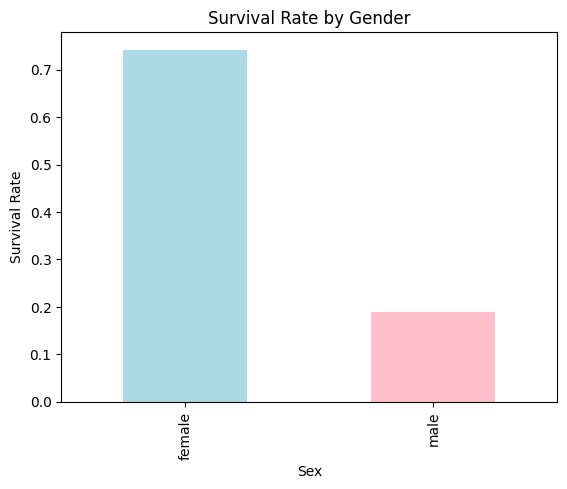

---  PROBLEM 5 RESULTS --- 
Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64


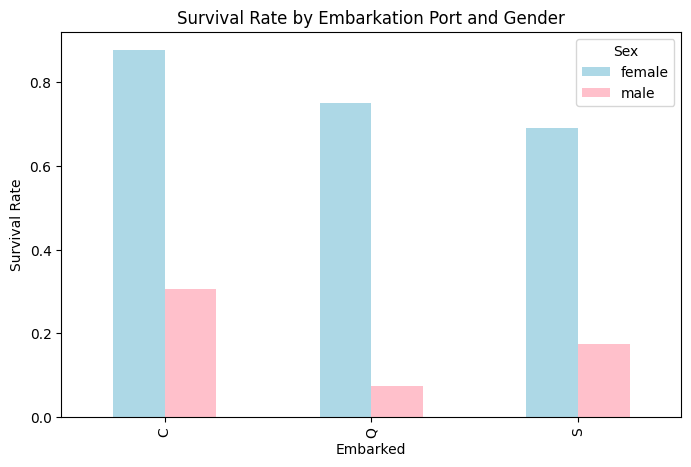

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# PROBLEM 1

# subset with only nedded cols
subset = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
# only first class passenger filtering
subset_first = subset[subset['Pclass'] == 1]

# All Fare statistics
mean_fare = subset_first['Fare'].mean()
median_fare = subset_first['Fare'].median()
min_fare = subset_first['Fare'].min()
max_fare = subset_first['Fare'].max()


print("--- PROBLEM 1 RESULT ---")
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Min Fare:", min_fare)
print("Max Fare:", max_fare)


# PROBLEM 2
# count how many null in Age col
null_age = subset_first['Age'].isnull().sum()
print("--- PROBLEM 2 RESULT ---")
print("Null Age values in first-class subset:", null_age)

# Drop rows with Age = NaN
subset_clean = subset_first.dropna(subset=['Age'])

# PROBLEM 3

# categorical values to binary cols
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

# adds cols to the og df
titanic_encoded = pd.concat([titanic, embarked_dummies], axis=1)

# removes og embark cols
titanic_encoded.drop(columns=['Embarked'], inplace=True)

print("--- PROBLEM 3 RESULTS --- ")
print(titanic_encoded.head())

# PROBLEM 4
# compare Survival rate by sex

# group rows based on ___, and calc avg of M and F
survival_by_sex = titanic.groupby('Sex')['Survived'].mean()
print("--- PROBLEM 4 RESULTS --- ")
print(survival_by_sex)

survival_by_sex.plot(kind='bar', color=['lightblue', 'pink'])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# PROBLEM 5
# Survival rate by Embarked, Sex, Visualization
survival_by_port = titanic.groupby(['Embarked', 'Sex'])['Survived'].mean()
print("---  PROBLEM 5 RESULTS --- ")
print(survival_by_port)

survival_by_port.unstack().plot(kind='bar', figsize=(8,5),color=['lightblue', 'pink'] )
plt.title("Survival Rate by Embarkation Port and Gender")
plt.ylabel("Survival Rate")
plt.show()